# Task №2
1. Develop yourself using numpy library: 

    a) a function to implement stochastic gradient descent (SGD) algorithm 
    
    b) Adam's optimization algorithm for a function of two variables f(x,y).
    
    
2. Come up with a function of two variables of an arbitrary form and implement the search for its minimum using those implemented in p.1 functions - a) and b).

3. Illustrate the process of finding an extremum in the form of a graph of the dependence of the value of the difference between two successive approximations of the solution (x_next – x_prev) on the iteration number N.

In [35]:
import numpy as np
import random
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter

def contour_plot(x_seq,y_seq, x1):
    plt.figure(1)
    CS = plt.contour(X, Y, Z, cmap=cm.RdBu)
    plt.clabel(CS, inline=1, fontsize=10)
    plt.plot(x1[0],x1[1],'ro')
    
    plt.plot(x_seq[:-1],y_seq[:-1],'rx')
    
    plt.plot(x_seq[-1],y_seq[-1],'bo')
    plt.show()

## Function defenition

[Three-hump camel function](https://www.sfu.ca/~ssurjano/camel3.html), $f_{min} (x_{f_{min}}) = 0, ~x_{f_{min}} = [0, 0]$

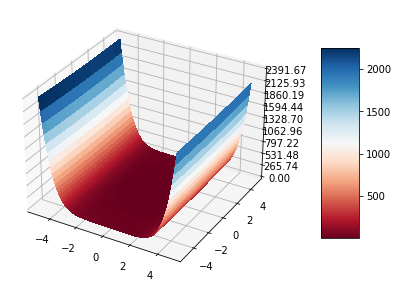

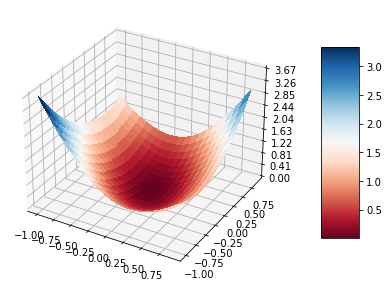

In [36]:
def f(x, y):
    return 2*x**2 - 0.5*x**4 + x**6/6 + x*y + y**2

def dx(x, y):
    return np.array([4*x - 2*x**3 + x**5 + y, 0])

def dy(x, y):
    return np.array([0, x + 2*y])

def grad(x, y):
    return dx(x,y) + dy(x,y)

def plot_f(f, range_=[-5, 5, 0.1]):
    x = np.arange(*range_)
    y = np.arange(*range_)
    X, Y = np.meshgrid(x, y)
    Z = f(X,Y)

    fig = plt.figure(1, figsize = (15, 5))
    ax = fig.gca(projection='3d')
    surf = ax.plot_surface(X, Y, Z, rstride=1, cstride=1, 
                          cmap=cm.RdBu,linewidth=0, antialiased=False)

    ax.zaxis.set_major_locator(LinearLocator(10))
    ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))
    fig.colorbar(surf, shrink = 0.7, aspect=5)
    plt.show()
    
plot_f(f)
plot_f(f, [-1, 1, 0.1])

x = np.arange(-5, 5, 0.1)
y = np.arange(-5, 5, 0.1)
X, Y = np.meshgrid(x, y)
Z = f(X,Y)

# Stochastic Gradient Descen

In [37]:
def stochastic_gradient():
    return random.choice([dx,dy])

def sgd(grad, init_x=np.array([0, 0]), learn_rate=1, epsilon=0.0001):
    seq_x = []
    seq_y = []
    
    n_iters = 0
    x_next = init_x
    
    err = np.inf
    while err > epsilon: 
        x_prev = x_next
        
        df = stochastic_gradient()
        x_next = x_prev - learn_rate*df(x_prev[0],x_prev[1])
        n_iters += 1
        
        seq_x = np.append(seq_x, x_next[0])
        seq_y = np.append(seq_y, x_next[1])
        
        err = np.linalg.norm(np.subtract(x_next,x_prev))
    
    return (x_next, n_iters, seq_x, seq_y)

# Adam optimization algorithm
[Adam, 2017](https://arxiv.org/pdf/1412.6980.pdf)

In [38]:
def adam(grad, init_x=np.array([0, 0]), learn_rate=1, epsilon=0.0001, beta_1=0.9, beta_2=0.999, e=1e-8):
    seq_x = []
    seq_y = []
    
    n_iters = 0
    x_next = init_x
    m = np.array([0, 0])
    v = np.array([0, 0])
    m_cap = np.array([0, 0])
    v_cap = np.array([0, 0])
    
    err = np.inf
    while err > epsilon:
        n_iters += 1

        x_prev = x_next 
        
        g = grad(*x_prev)
        m = beta_1 * m + (1 - beta_1)*g
        v = beta_2 * v + (1 - beta_2)*g**2
        m_cap = m / (1 - beta_1**n_iters)
        v_cap = v / (1 - beta_2**n_iters)
        
        x_next = x_prev - learn_rate * m_cap / (np.sqrt(v_cap) + e)
        
        seq_x = np.append(seq_x, x_next[0])
        seq_y = np.append(seq_y, x_next[1])
        
        err = np.linalg.norm(np.subtract(x_next,x_prev))
    
    return (x_next, n_iters, seq_x, seq_y)

# Plotting the optimization steps
#### (x_next - x_prev) on nth iteration

In [45]:
def plot_optimization_steps(sdg_res, adam_res):
    _, _, x1, x2 = sdg_res
    
    sgd_steps = []
    for i in range(1, len(x1)):
        x_prev = np.array([x1[i-1], x2[i-1]])
        x_next = np.array([x1[i], x2[i]])
        sgd_steps.append( np.linalg.norm(np.subtract(x_next,x_prev)) )
    
    sgd_x = range(1, len(x1))
    
    _, _, x1, x2 = adam_res
    
    adam_steps = []
    for i in range(1, len(x1)):
        x_prev = np.array([x1[i-1], x2[i-1]])
        x_next = np.array([x1[i], x2[i]])
        adam_steps.append( np.linalg.norm(np.subtract(x_next,x_prev)) )
    
    adam_x = range(1, len(x1))
    
    sgd_line, = plt.plot(sgd_x, sgd_steps, 'bo', label="SGD")
    adam_line, = plt.plot(adam_x, adam_steps, 'ro', label="Adam")
    
    plt.xlabel("iterations")
    plt.ylabel("x_next - x_prev")
    
    plt.legend([sgd_line, adam_line], ['SGD', 'Adam'])
    
    plt.show()

In [53]:
def show_plots(init_x):

    sdg_res = sgd(stochastic_gradient, init_x, 0.05)

    adam_res = adam(grad, init_x, 0.05)
    
    print('Minimum (x,y) from stochastic gradient descent: %s' %sdg_res[0])
    print('Number of stochastic gradient descent iterations: %s' %sdg_res[1])

    contour_plot(sdg_res[2], sdg_res[3], init_x)
    
    print('Minimum (x,y) from adam optimization algorithm: %s' %adam_res[0])
    print('Number of adam optimization algorithm iterations: %s' %adam_res[1])

    contour_plot(adam_res[2], adam_res[3], init_x)
    
    plot_optimization_steps(sdg_res, adam_res)

# Initial state = [1, 1]

Minimum (x,y) from stochastic gradient descent: [ 0.00195486 -0.00182577]
Number of stochastic gradient descent iterations: 94


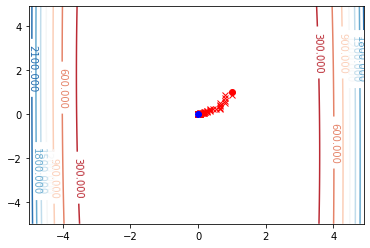

Minimum (x,y) from adam optimization algorithm: [-0.01126564 -0.00594885]
Number of adam optimization algorithm iterations: 88


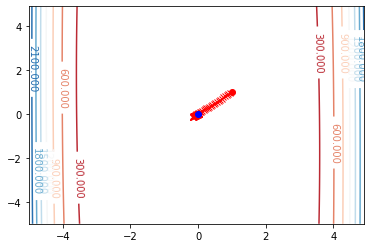

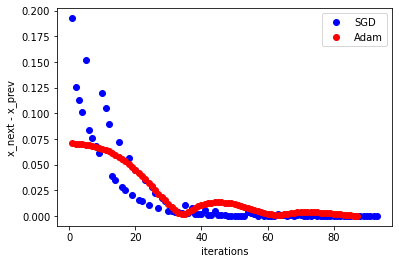

In [54]:
show_plots([1, 1])

# Initial state = [0.5, -1]

Minimum (x,y) from stochastic gradient descent: [ 0.00174976 -0.00557224]
Number of stochastic gradient descent iterations: 124


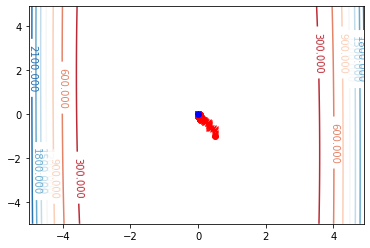

Minimum (x,y) from adam optimization algorithm: [ 0.00106865 -0.00243693]
Number of adam optimization algorithm iterations: 115


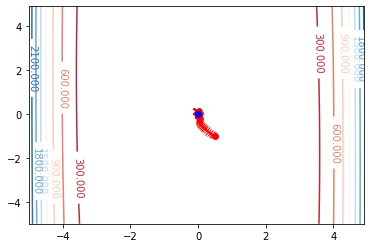

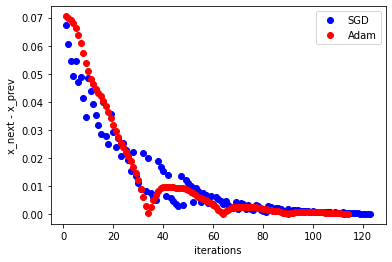

In [55]:
show_plots([0.5, -1])

# Initial state = [-2, 2]

Minimum (x,y) from stochastic gradient descent: [-0.00126604  0.0035253 ]
Number of stochastic gradient descent iterations: 166


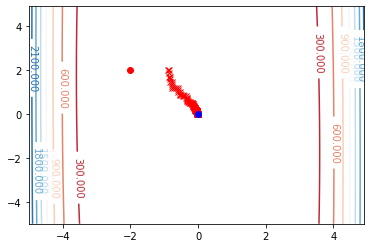

Minimum (x,y) from adam optimization algorithm: [ 0.00419721 -0.00253102]
Number of adam optimization algorithm iterations: 146


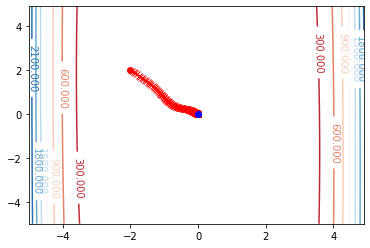

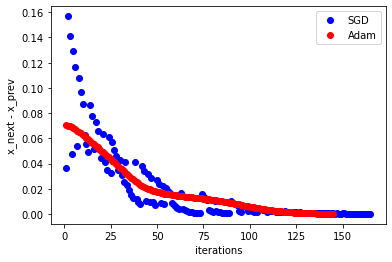

In [56]:
show_plots([-2, 2])

# Conclusion
In this practical tasks two optimization methods were implemented and compared.

The number of iterations of each algorithm may depend on the initial guess and learning rate.
The Adam algorithm generally converges faster and avoids quick jumps in values in comparison with Stochastic Gradient Descent.